# ASSIGNMENT 2 - Classification Problem

## Name: Karthik Raja Kalaiselvi Bhaskar
## Student Number - 1004527283


In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
# For allowing chained rules within the dataframe

pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 999

In [3]:
#Importing files 
train_set = pd.read_csv("income-training.csv")
test_set = pd.read_csv("income-testing.csv")
print("Training Set shape is: ", train_set.shape)
print("Testing Set shape is: ", test_set.shape)

Training Set shape is:  (24421, 15)
Testing Set shape is:  (12211, 15)


In [4]:
#Creating a New Column with name INCOME
train_set["Income"] = " "
train_set.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K,
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K,
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K,
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K,
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K,


In [5]:
#Converting Income bracket (string) to Income (numerical).
#Numerical data is better for Analysis
for i in range (len(train_set.IncomeBracket)):
    if train_set.IncomeBracket[i] =="<50K":
        train_set.Income[i] = 0
    elif train_set.IncomeBracket[i] =="50-100K":
        train_set.Income[i] = 1
    elif train_set.IncomeBracket[i] ==">100K":
        train_set.Income[i] = 2

In [6]:
#Updated Table with Income value
train_set.head()


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K,0
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K,0
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K,1
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K,0
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K,0


In [7]:
#Checking the income range
# 0 = <50k
# 1 = 50-100k
# 2 = >100k
train_set["Income"].value_counts()
income_counts = train_set["Income"]
income_counts.value_counts()

0    18433
1     3994
2     1994
Name: Income, dtype: int64

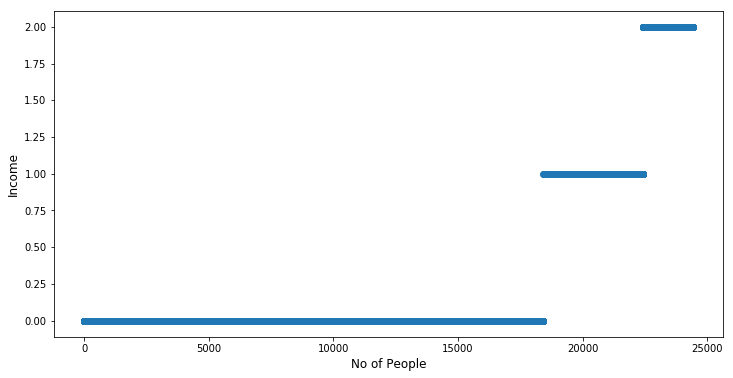

In [8]:
#Plotting the Income range for visual understanding
plt.figure(figsize = (12,6))
plt.scatter(range(train_set.shape[0]), np.sort(income_counts.values))
plt.xlabel("No of People", fontsize = 12)
plt.ylabel("Income", fontsize = 12)
plt.show()

From the above Graph, we can say that 80% of the people have income below 50k and 5% have income more than 100k and the rest of them have income between 50-100k

To be exact, 18433 people have income less than 50K, 3994 people have income between 50-100K and 1994 people have income greater than 100K

In [9]:
# To avoid erros 
train_set["Income"] = pd.to_numeric(train_set["Income"], errors = "coerce") 

#Types of Data
data_type = train_set.dtypes.reset_index()
data_type.columns = ["Name of Column", "Column Type"]
data_type.groupby("Column Type").aggregate('count').reset_index()
data_type.iloc[:16, :]

,Name of Column,Column Type
0,Age,int64
1,WorkClass,object
2,FinalWeight,int64
3,Education,object
4,EducationLvl,int64
5,MaritalStatus,object
6,Occupation,object
7,Relationship,object
8,Race,object
9,Sex,object


In [10]:
#Checking for the missing values in the training set (train_set)
missing_values = train_set.isnull().sum(axis=0).reset_index()
missing_values.columns = ["Name of Column", "NumberOfMissingValues"]
missing_values = missing_values.loc[missing_values["NumberOfMissingValues"]>0]
missing_values

,Name of Column,NumberOfMissingValues
1,WorkClass,1384
6,Occupation,1390
13,NativeCountry,395


# DATA CLEANING

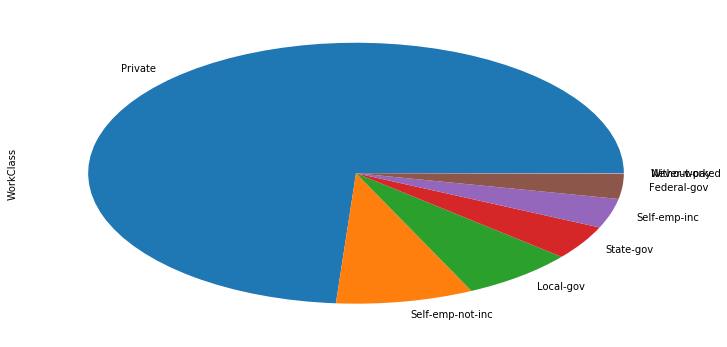

In [11]:
#We have 3 columns with missing values
# Looking into WorkClass column
work = train_set["WorkClass"].value_counts()
plt.figure(figsize =(12,6))
work.plot(kind = 'pie')
plt.show()

In [12]:
#Numerical Details of Work Class
work

Private             17002
Self-emp-not-inc     1910
Local-gov            1574
State-gov             978
Self-emp-inc          844
Federal-gov           712
Without-pay            11
Never-worked            6
Name: WorkClass, dtype: int64

#### Private is the dominating WorkClass

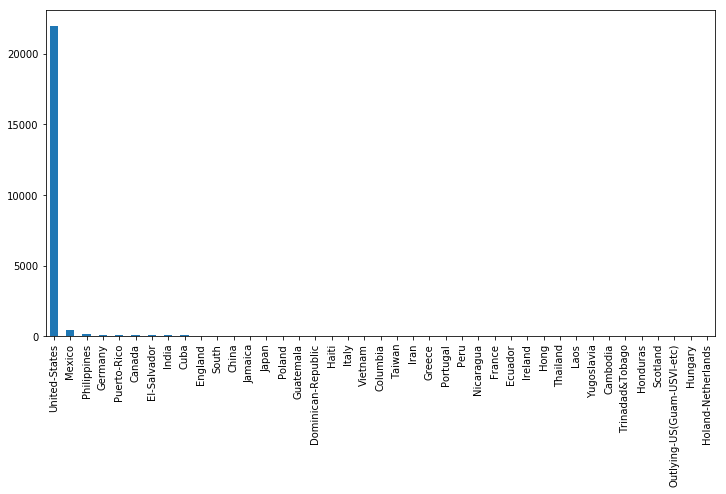

In [13]:
country = train_set["NativeCountry"].value_counts()
plt.figure(figsize =(12,6))
country.plot(kind = 'bar')
plt.show()

In [14]:
#Numerical Data for Native Country
country

United-States                 21978
Mexico                          485
Philippines                     146
Germany                          96
Puerto-Rico                      90
Canada                           82
El-Salvador                      80
India                            73
Cuba                             71
England                          59
South                            58
China                            56
Jamaica                          53
Japan                            46
Poland                           46
Guatemala                        44
Dominican-Republic               44
Haiti                            43
Italy                            43
Vietnam                          43
Columbia                         39
Taiwan                           31
Iran                             31
Greece                           31
Portugal                         27
Peru                             21
Nicaragua                        20
France                      

#### United States is the dominant Native Country

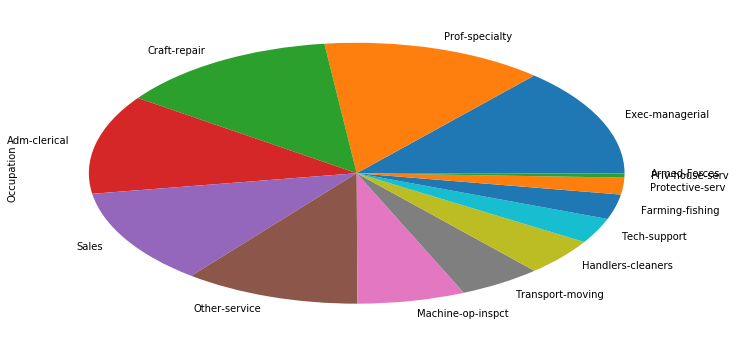

In [15]:
occupation = train_set["Occupation"].value_counts()
plt.figure(figsize =(12,6))
occupation.plot(kind = 'pie') 
plt.show()

In [16]:
#Numerical Data for Occupation
occupation

Exec-managerial      3102
Prof-specialty       3099
Craft-repair         3062
Adm-clerical         2833
Sales                2738
Other-service        2449
Machine-op-inspct    1499
Transport-moving     1151
Handlers-cleaners    1062
Tech-support          723
Farming-fishing       710
Protective-serv       480
Priv-house-serv       115
Armed-Forces            8
Name: Occupation, dtype: int64

#### Not like WorkClass and NativeCountry, Occupation has a somewhat equal distribution

'MODE' is the commonly used method for filling missing value

  So I am using MODE for WorkClass and NativeCountry Column to fill the missing values
  
  Mode of WorkClass is Private
  
  Mode of NativeCountry is United-States

In [17]:
train_set = train_set.fillna({"WorkClass":"Private"})

train_set = train_set.fillna({"NativeCountry":"United-States"})

#Checking the Columns updated with Mode values

train_set.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K,0
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K,0
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K,1
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K,0
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K,0


Occupation is a Categorical data, so we can't able to use Mode Method. So I am using Random Forest to predict the occupation for the Missing values 

In [18]:
#Checking the count of missing values in Occupation category
train_set.isnull().sum(axis=0)
#There are 1390 values are missing in the occupation and we need to find those values.

Age                 0
WorkClass           0
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1390
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry       0
IncomeBracket       0
Income              0
dtype: int64

In [19]:
#Arranging Occupation Column by alphabetical order
train_set.sort_values(by = "Occupation", inplace=True)
train_set = train_set.reset_index(drop=True)
train_set.tail()

#Bottom values of Occupation are NaN which means it is sorted.

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
24416,63,Private,109446,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<50K,0
24417,52,Private,159755,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,0,50,United-States,50-100K,1
24418,67,Private,150516,HS-grad,9,Widowed,NaN,Unmarried,White,Male,0,0,3,United-States,<50K,0
24419,68,Private,110931,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,32,United-States,<50K,0
24420,27,Private,294642,HS-grad,9,Separated,NaN,Unmarried,Black,Female,0,0,40,United-States,<50K,0


In [20]:
#occ_train has all the occupation and occ_test has all the NaN values to be predicted for occupation
occ_train = train_set[0:23031]
occ_test = train_set[23031:]


In [21]:
# Using LableEncoder to Encode all the Categorical datas in the test and training set of occupation
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_encoder = occ_train.apply(LabelEncoder().fit_transform) 
test_encoder = occ_test.apply(LabelEncoder().fit_transform)   


In [22]:
#Assining X_train, X_test y_train and y_test 
X_train = train_encoder.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,15]]
y_train = train_encoder.iloc[:, 6]
X_test = test_encoder.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,15]]
y_test = test_encoder.iloc[:, 6]

In [23]:
#Random Forest Classifier for Predicting the Occupation
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
#Predicting the Occupation
y_pred = rfc.predict(X_test)

# Assigning y_pred to y_test, since y_test has only NaN values which are to be predicted
y_test = y_pred
print(y_test)

[0 0 6 ..., 7 0 2]


In [25]:
#Assigning y_test to the Occupation Column of the tables
occ_test.iloc[:, 6] = y_test

In [26]:
#Combining the occ_train and occ_test which has been encoded. So that we can decode it to the normal form again
encoded_set = pd.concat([occ_train,occ_test], ignore_index = True)
encoded_set.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,0
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,<50K,0
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,0
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<50K,0
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<50K,0


Occupation Column has values from 0 to 13 which corresponds to

0 - Adm-clerical
1 - Armed-Forces
2 - Craft-repair
3 - Exec-managerial
4 - Farming-fishing
5 - Handlers-cleaners
6 - Machine-op-inspct
7 - Other-service
8 - Priv-house-serv
9 - Prof-specialty
10 - Protective-serv
11 - Sales
12 - Tech-support
13 - Transport-moving

In [27]:
#Decoding the Occupation Column 
for i in range (len(encoded_set.Occupation)):
    if encoded_set.Occupation[i] ==0:
        encoded_set.Occupation[i] = "Adm-clerical"
    elif encoded_set.Occupation[i] ==1:
        encoded_set.Occupation[i] = "Armed-Forces"
    elif encoded_set.Occupation[i] ==2:
        encoded_set.Occupation[i] = "Craft-repair"
    elif encoded_set.Occupation[i] ==3:
        encoded_set.Occupation[i] = "Exec-managerial"
    elif encoded_set.Occupation[i] ==4:
        encoded_set.Occupation[i] = "Farming-fishing"
    elif encoded_set.Occupation[i] ==5:
        encoded_set.Occupation[i] = "Handlers-cleaners"
    elif encoded_set.Occupation[i] ==6:
        encoded_set.Occupation[i] = "Machine-op-inspct"
    elif encoded_set.Occupation[i] ==7:
        encoded_set.Occupation[i] = "Other-service"
    elif encoded_set.Occupation[i] ==8:
        encoded_set.Occupation[i] = "Priv-house-serv"
    elif encoded_set.Occupation[i] ==9:
        encoded_set.Occupation[i] = "Prof-specialty"
    elif encoded_set.Occupation[i] ==10:
        encoded_set.Occupation[i] = "Protective-serv"
    elif encoded_set.Occupation[i] ==11:
        encoded_set.Occupation[i] = "Sales"
    elif encoded_set.Occupation[i] ==12:
        encoded_set.Occupation[i] = "Tech-support"
    elif encoded_set.Occupation[i] ==13:
        encoded_set.Occupation[i] = "Transport-moving"

encoded_set.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,0
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,<50K,0
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,0
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<50K,0
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<50K,0


In [28]:
# Checking for the presence of any missing values in the column
encoded_set.isnull().sum(axis=0)

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
Income           0
dtype: int64

In [29]:
#Assigning the decoded occupation column to the original training set, so that the predicted values are upadated and used for analysis
train_set["Occupation"] = encoded_set["Occupation"]
train_set.tail()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
24416,63,Private,109446,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,0
24417,52,Private,159755,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,50-100K,1
24418,67,Private,150516,HS-grad,9,Widowed,Other-service,Unmarried,White,Male,0,0,3,United-States,<50K,0
24419,68,Private,110931,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,32,United-States,<50K,0
24420,27,Private,294642,HS-grad,9,Separated,Craft-repair,Unmarried,Black,Female,0,0,40,United-States,<50K,0


In [30]:
#Overall Stats for Training set
train_set.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,Income
count,24421.000000,2.442100e+04,24421.000000,24421.000000,24421.00000,24421.000000,24421.000000
mean,38.635273,1.908781e+05,10.100078,1073.734900,90.72581,40.495352,0.326850
std,13.658678,1.066108e+05,2.579953,7372.250508,410.42682,12.363606,0.619142
min,17.000000,1.349200e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,28.000000,1.182590e+05,9.000000,0.000000,0.00000,40.000000,0.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,48.000000,2.394090e+05,13.000000,0.000000,0.00000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.00000,99.000000,2.000000


# EXPLORATORY ANALYSIS

### a

In [31]:
#Seperating Numerical and Categorical datas seperately
# Identify Numeric features
numeric_features = ['Age','FinalWeight','EducationLvl','CapitalGain','CapitalLoss','HoursPerWeek','Income']

# Identify Categorical features
cat_features = ['WorkClass','Education','MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'NativeCountry']

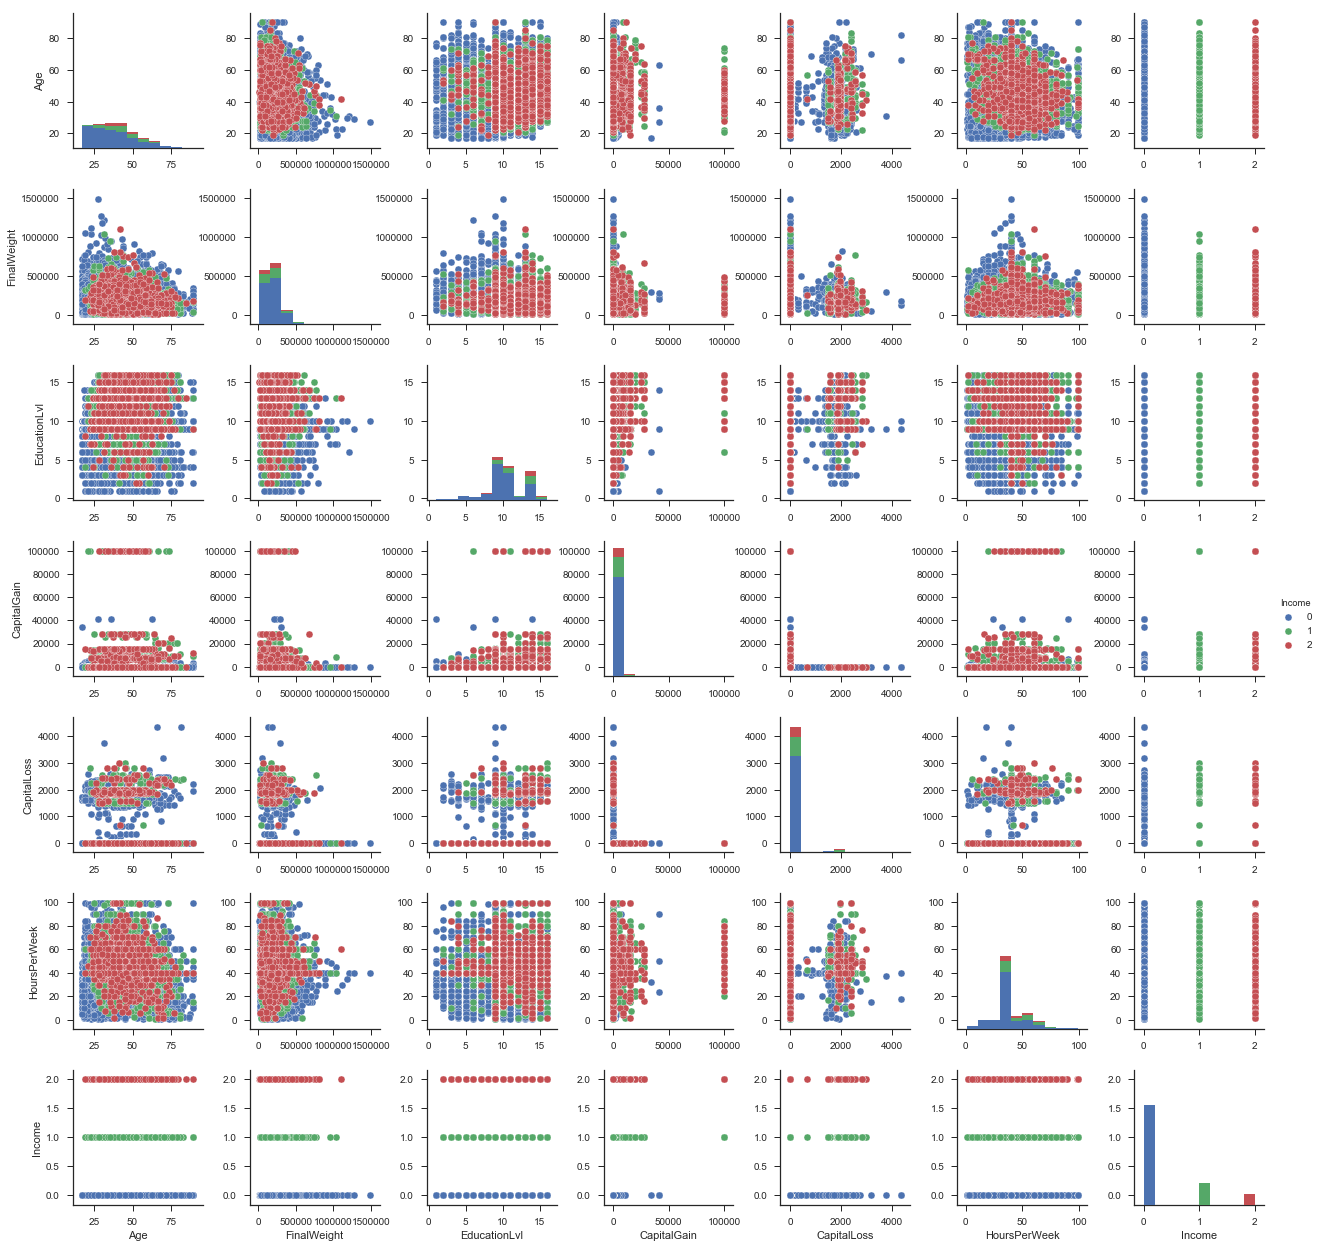

In [32]:
# Visualizing Income with Numerical datas in the dataframe (Seaborn makes it easy)

plt.figure(figsize =(20,10))
sns.set(style="ticks")
sns.pairplot(train_set, hue = "Income")
plt.show()

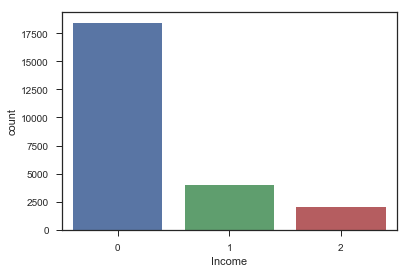

In [33]:
# Count of <=50K, 50K-100K, >100K
sns.countplot(train_set['Income'],label="Count")
plt.show()

The above plot shows that around 18000 people income is less than 50K around 4000 people income is between 50 to 100K and around 2000 people income is more than 100K

AGE

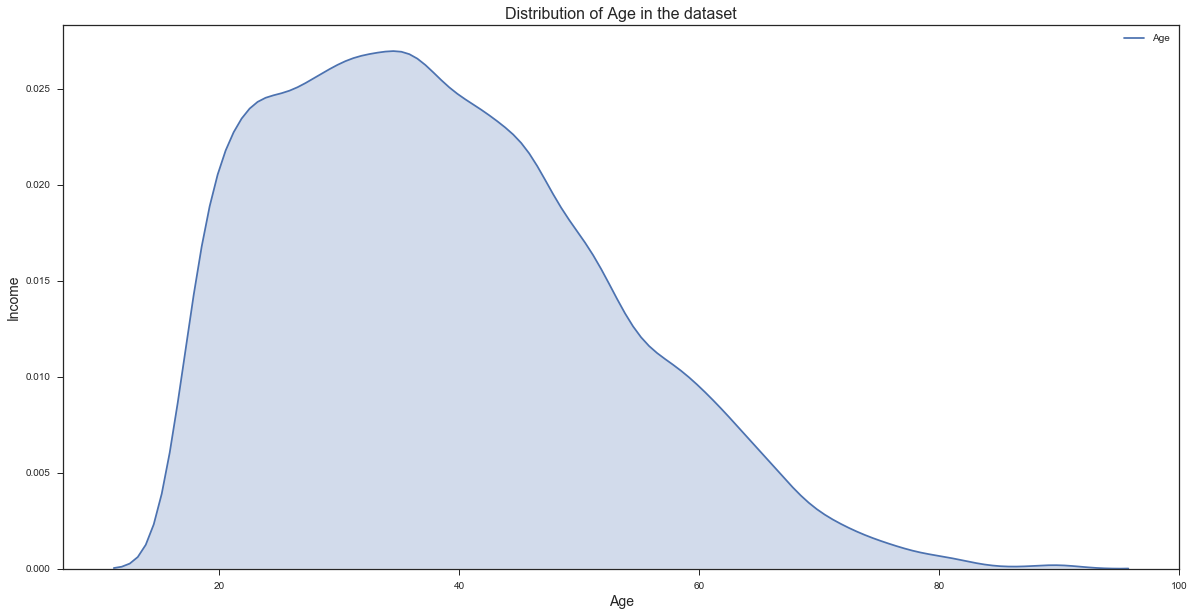

In [34]:
var_name = train_set["Age"]
plt.figure(figsize =(20,10))
sns.kdeplot(var_name, shade = True)
plt.xlabel('Age', fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Age in the dataset", fontsize =16 )
plt.show()

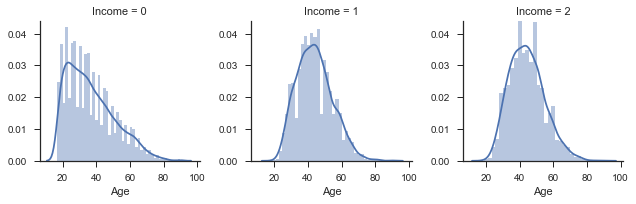

In [35]:
# Explore Age vs Income
g = sns.FacetGrid(train_set, col='Income')
g = g.map(sns.distplot, "Age")
plt.show()


Dataset contains more people between 20 to 60 

INFERENCE: We can easily see that, age group between 25 to 70 mainly has a income bracket spread across <50K 50-100K and 100K

Whereas the age group beyond 70 doesn't have much income spread comparitively.

Therefore, INCOME DECREASES AS AGE INCREASES

WORKCLASS

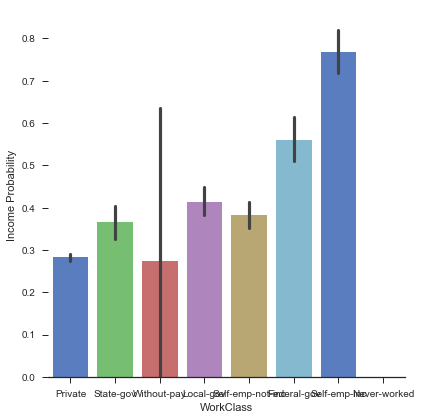

In [36]:
# Explore Workclass vs Income
g = sns.factorplot(x="WorkClass",y="Income",data=train_set,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income Probability")
plt.show()

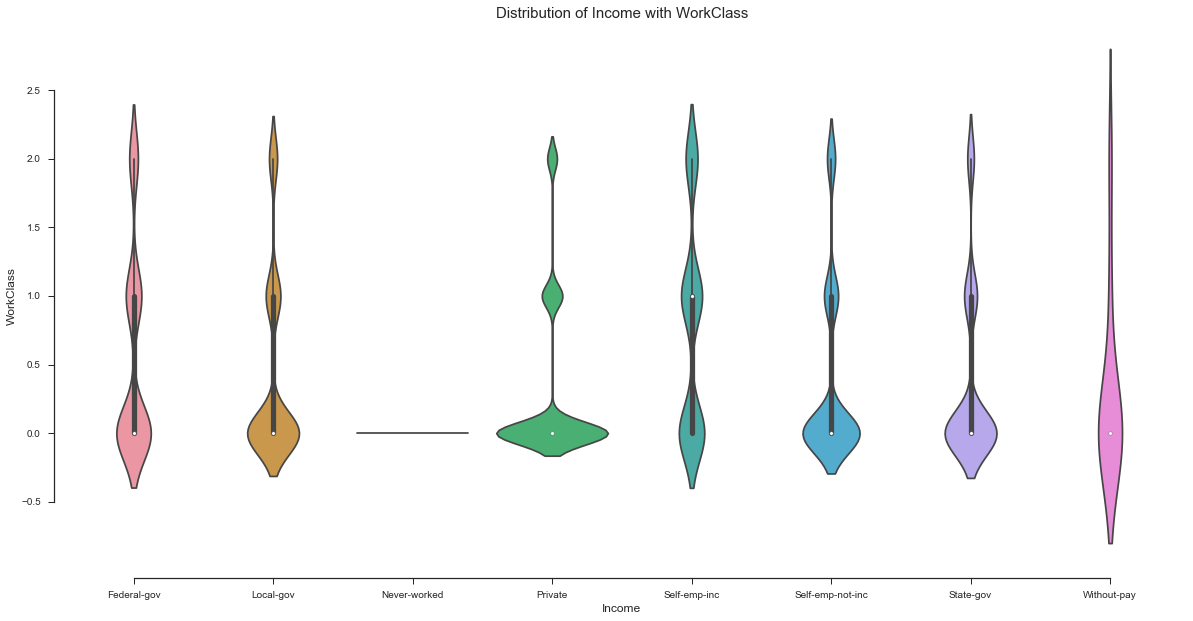

In [37]:
var_name = "WorkClass"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.violinplot(y='Income', x = var_name, data=train_set, order =col_order)
sns.despine(offset=10, trim=True)
plt.ylabel(var_name, fontsize =12)
plt.xlabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

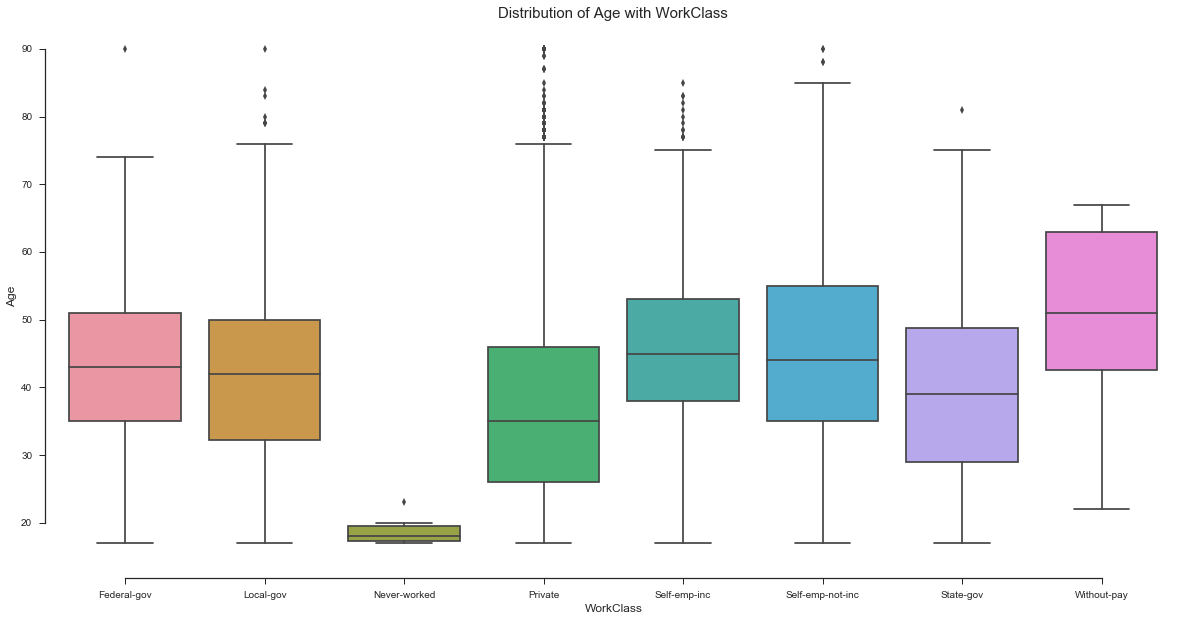

In [38]:
var_name = "WorkClass"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.boxplot(x=var_name, y = 'Age', data=train_set, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Age', fontsize = 12)
plt.title("Distribution of Age with " +var_name, fontsize =15 )
plt.show()

From the graphs,  WORKCLASSES- "NEVER WORKED" and "WITHOUT-PAY" has very less or no income. WorkClass - Self Employed has highest span of income.

EDUCATIONLEVEL

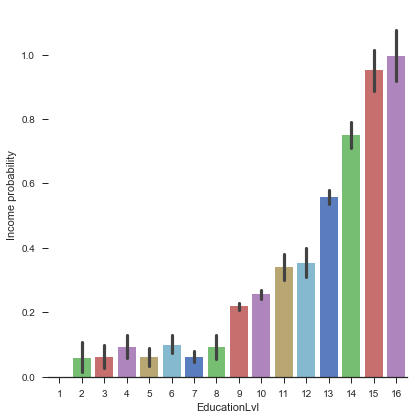

In [39]:
# Explore Education Num vs Income
g = sns.factorplot(x="EducationLvl",y="Income",data=train_set,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income probability")
plt.show()

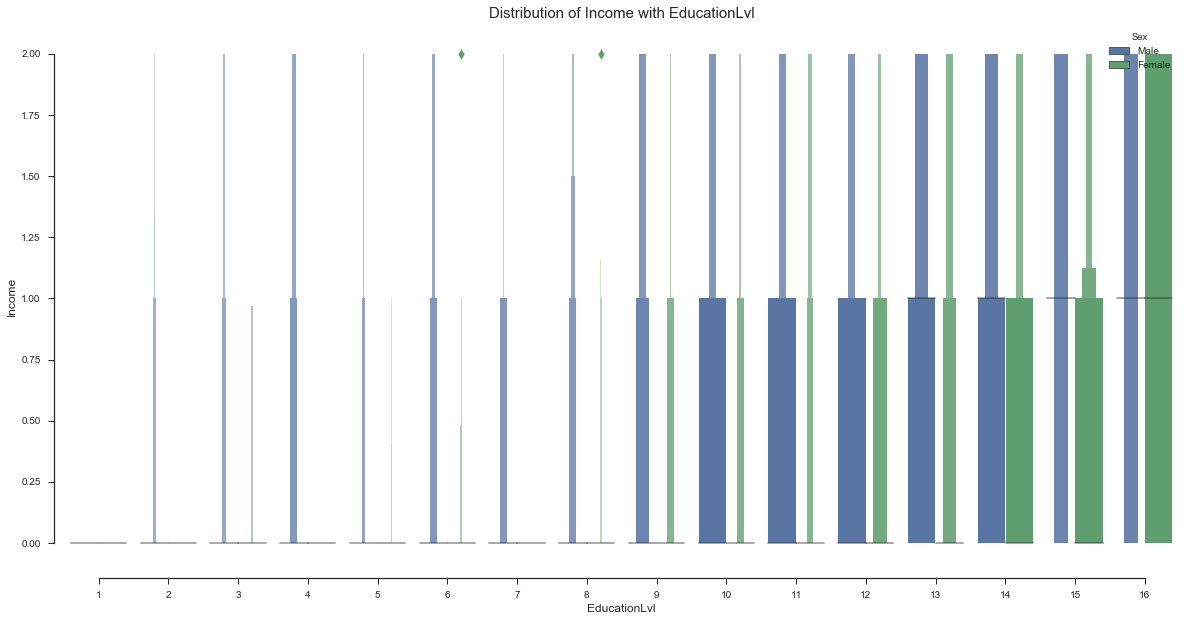

In [40]:
var_name = "EducationLvl"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(20,10))
sns.lvplot(x=var_name, y = 'Income', hue = "Sex", data=train_set, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =12)
plt.ylabel('Income', fontsize = 12)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

Higher the Level of Education, Higher the rate of Income and also Interestingly Women have higher income than men when they have highest level of education. Also Men and women have equal counts in terms of education

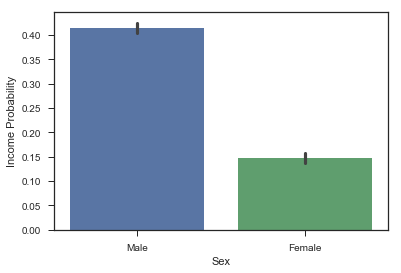

In [41]:
# Explore Sex vs Income
g = sns.barplot(x="Sex",y="Income",data=train_set)
g = g.set_ylabel("Income Probability")
plt.show()

The above graph shows that majority of males are working and less number of women are working

MARITAL STATUS

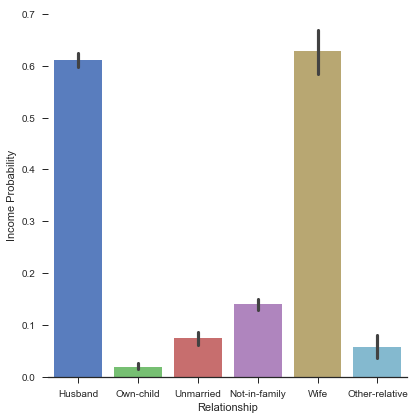

In [42]:
# Explore Relationship vs Income
g = sns.factorplot(x="Relationship",y="Income",data=train_set,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income Probability")
plt.show()

Most of the Couples (Husband & Wife) goes to work earn income.

OCCUPATION

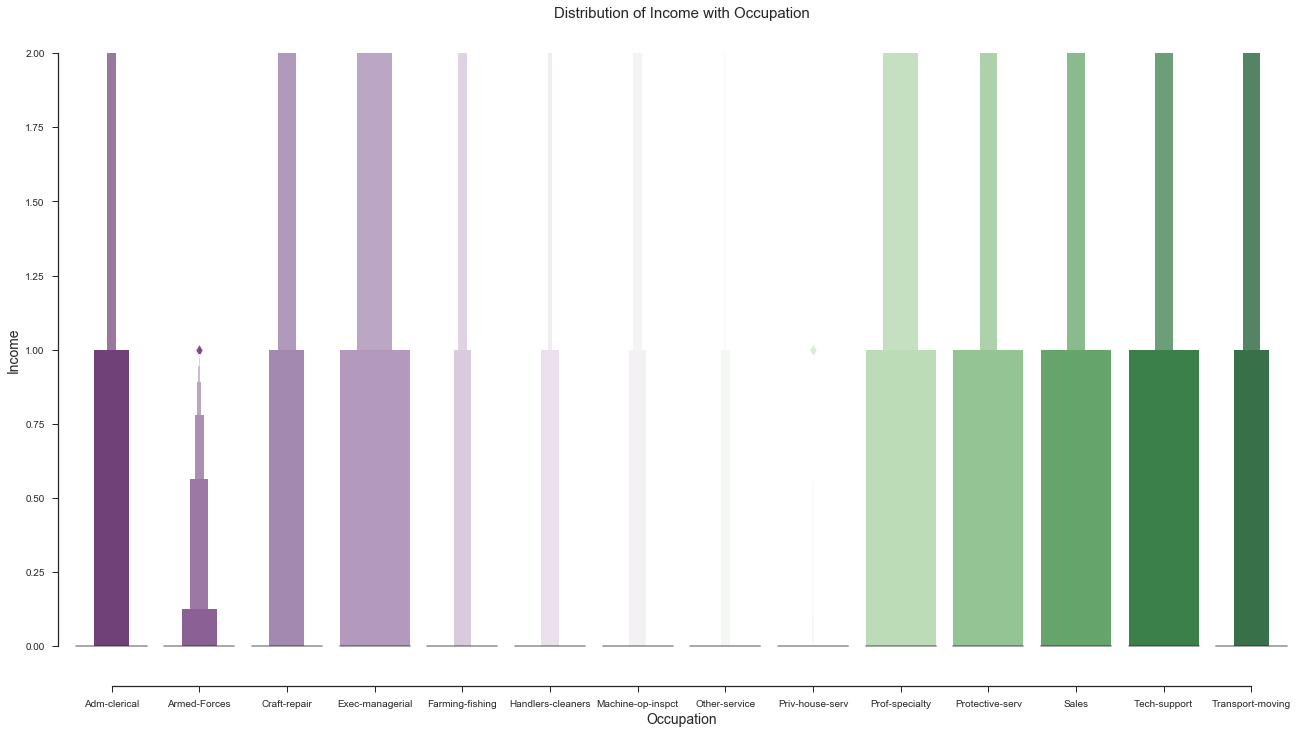

In [43]:
var_name = "Occupation"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_set, order =col_order, palette = "PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

Occupations Like 'Exec-Managerial','Prof-Speciality','Craft-Repari','Protective-Serv','Sales' are high paying jobs whereas occupations like 'Tech-Support','Anti-Clerical','Armed-Forces' and other jobs are low paying jobs

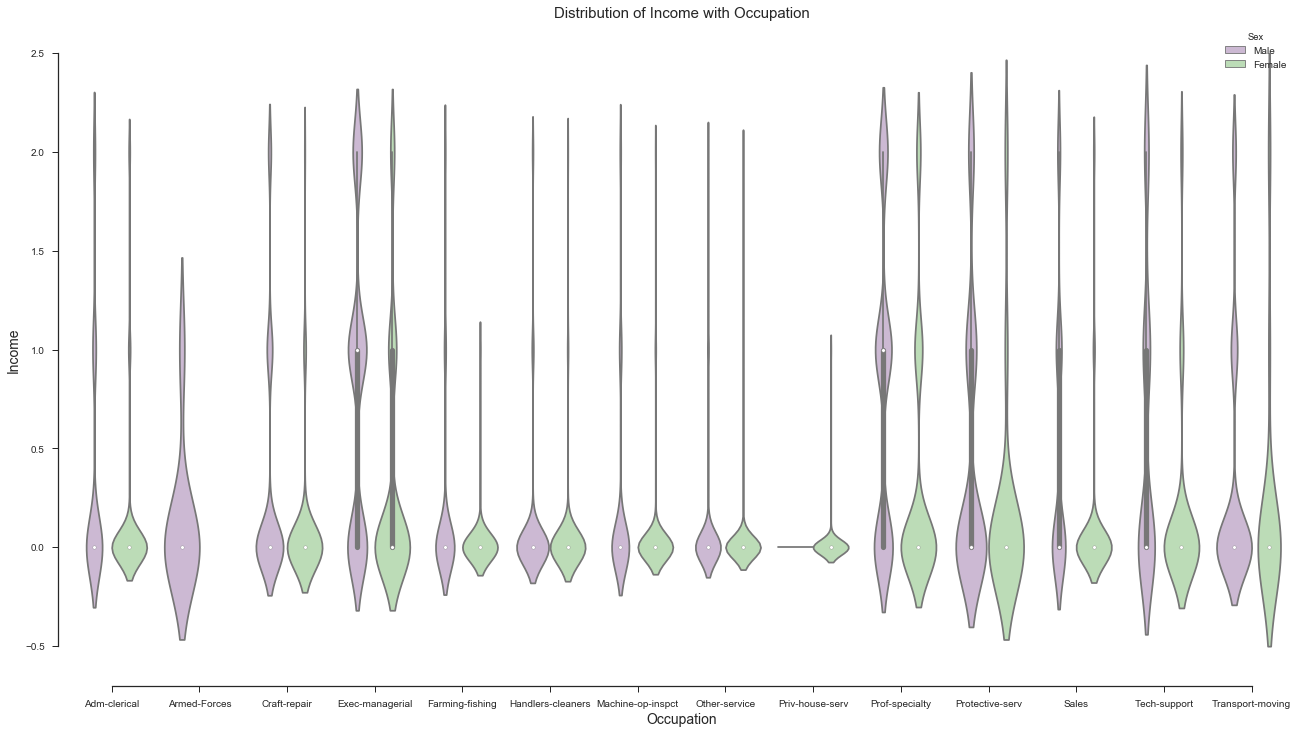

In [44]:
var_name = "Occupation"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.violinplot(x=var_name, y = 'Income', hue = "Sex", data=train_set, order =col_order, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

From the graph, Women are equally working in all professionals except Armed-Forces

RELATIONSHIP

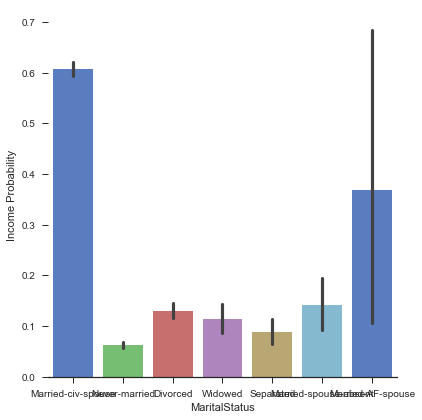

In [45]:
# Explore Marital Status vs Income
g = sns.factorplot(x="MaritalStatus",y="Income",data=train_set,kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income Probability")
plt.show()

Husband and Wife are most prominet relationship with good income, while one-child, divorced, widowed etc are with least income band.


RACE

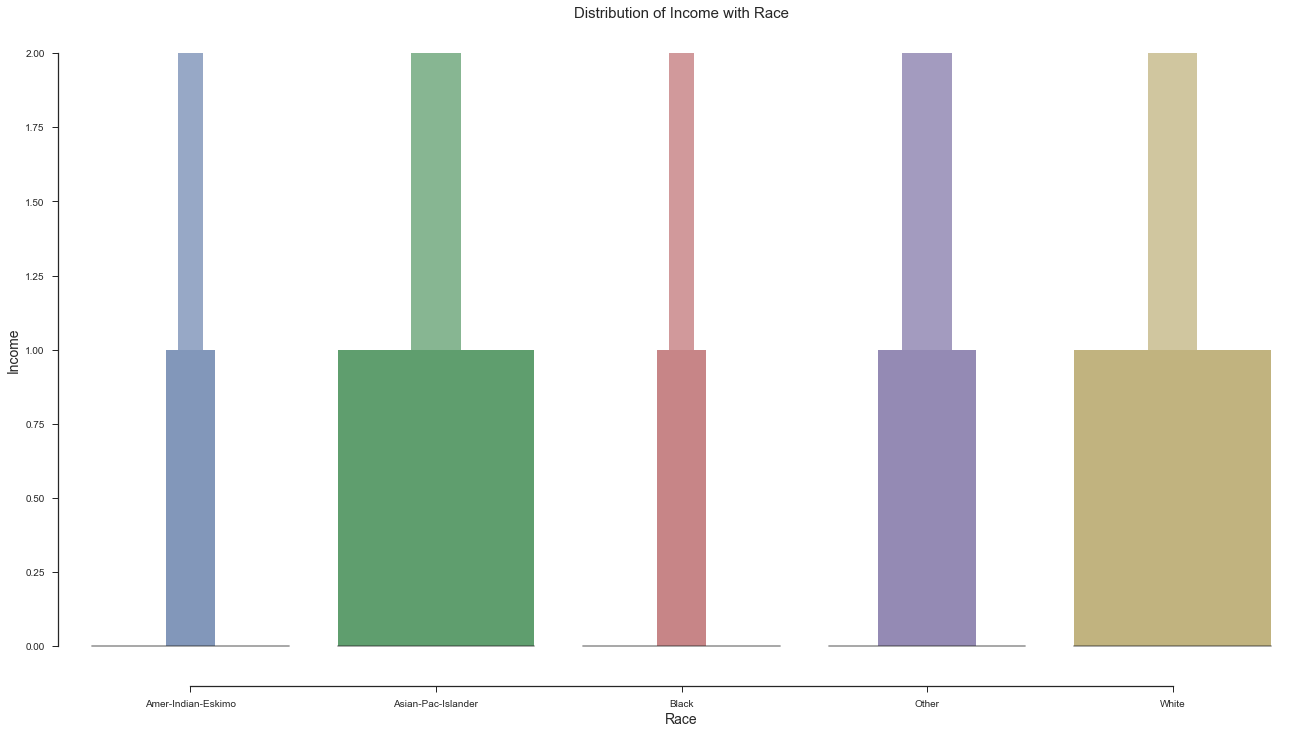

In [46]:
var_name = "Race"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(22,12))
sns.lvplot(x=var_name, y = 'Income', data=train_set, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

'WHITE' and 'ASIAN-PAC-ISLANDER' Were most prominent with 'BLACK' race being the least

HOURS PER WEEK

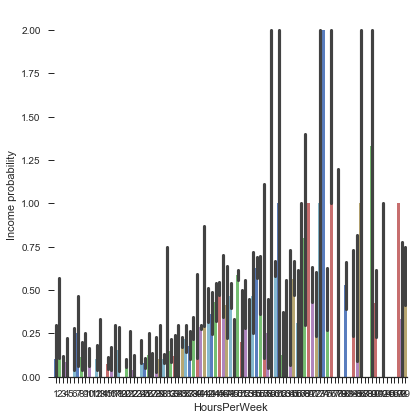

In [47]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="HoursPerWeek",y="Income",data=train_set,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income probability")
plt.show()

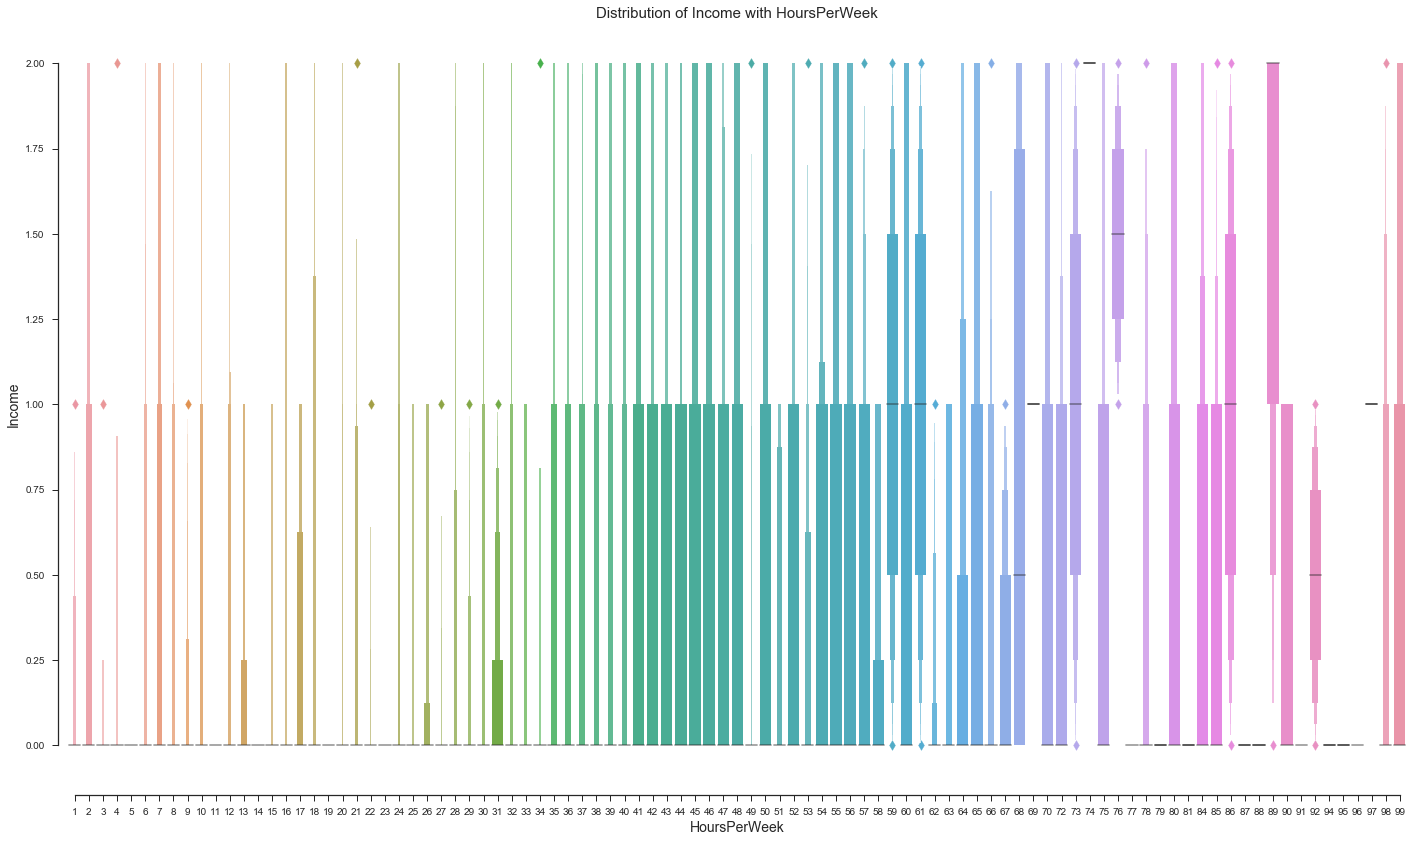

In [48]:
var_name = "HoursPerWeek"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.lvplot(x=var_name, y = 'Income', data=train_set, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('Income', fontsize = 14)
plt.title("Distribution of Income with " +var_name, fontsize =15 )
plt.show()

From the above two graphs, we can see that, less number of people are working less than 40 hours

and more people working between 40 hours - 85 hours a week and they spread across all levels of income

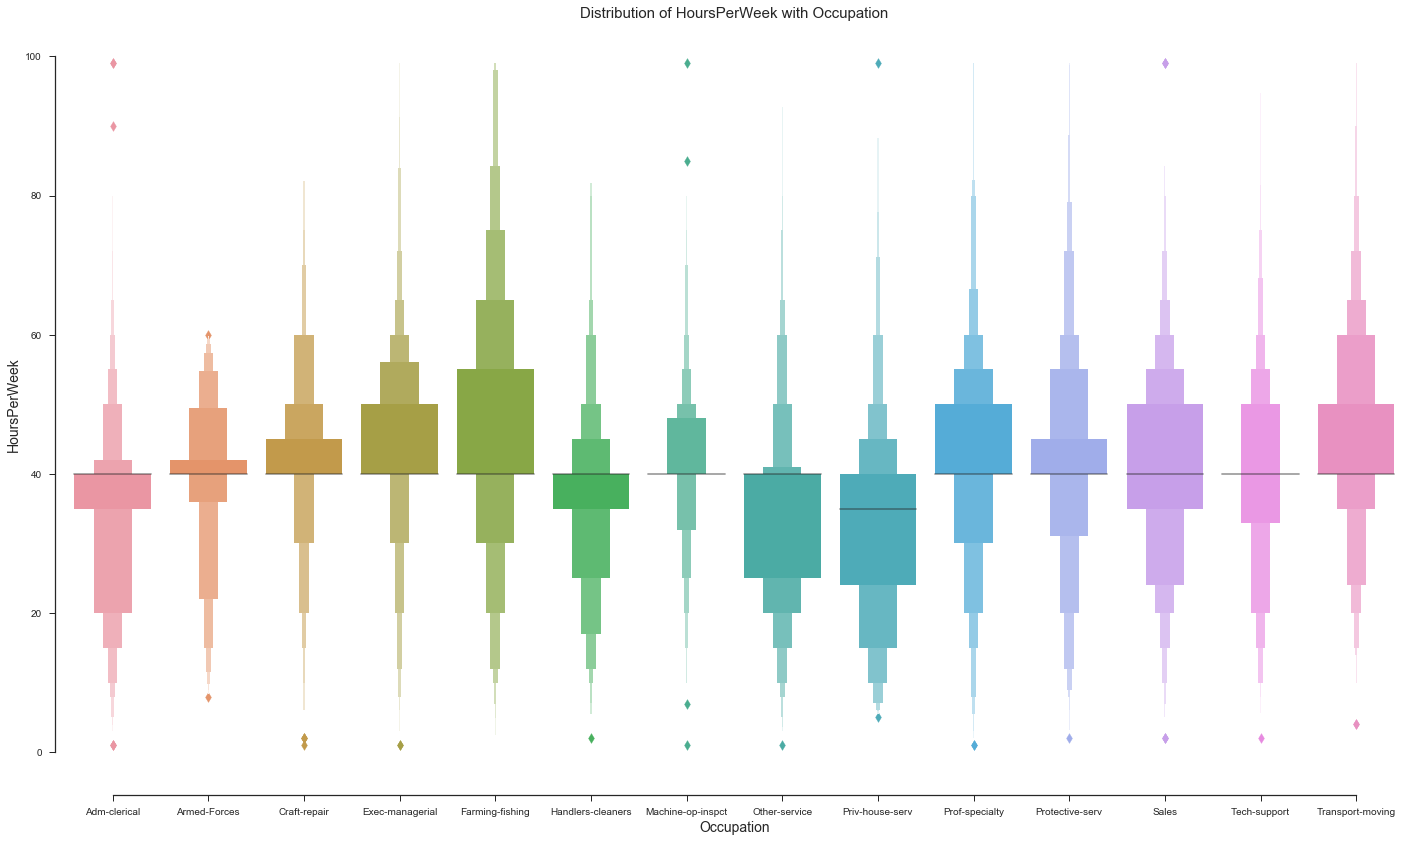

In [49]:
var_name = "Occupation"
col_order = np.sort(train_set[var_name].unique()).tolist()
plt.figure(figsize =(24,14))
sns.lvplot(x=var_name, y = 'HoursPerWeek', data=train_set, order =col_order)
sns.despine(offset=10, trim=True)
plt.xlabel(var_name, fontsize =14)
plt.ylabel('HoursPerWeek', fontsize = 14)
plt.title("Distribution of HoursPerWeek with " +var_name, fontsize =15 )
plt.show()


Jobs like Farming-Fishing, Protective-Serv and sales includes more hours but less income, unlike Prof-Specialtiy, Exec-Managerial has higher income eventhough they work less hours

### b

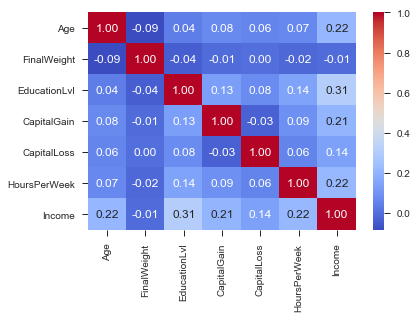

In [50]:
# Correlation matrix between numerical values
g = sns.heatmap(train_set[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

From the above Correlation Graph (HeatMap) we can see that Age & income, Education Level & Income, Capital Gain & Income, Hours Per Week & Income has high correlation than other factors.

# Feature Engineering

In [51]:
train_set

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<50K,0
1,47,State-gov,263215,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,80,United-States,<50K,0
2,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,0
3,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<50K,0
4,48,Local-gov,319079,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<50K,0
5,17,Private,298605,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<50K,0
6,53,State-gov,156877,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,15024,0,35,United-States,>100K,2
7,33,Private,214129,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<50K,0
8,48,Private,167009,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,48,United-States,<50K,0
9,46,Private,164427,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,0,45,United-States,<50K,0


In [52]:
# Convert Sex value to 0 and 1
train_set["Sex"] = train_set["Sex"].map({"Male": 0, "Female":1})
# Create Married Column - Binary Yes(1) or No(0)
train_set["MaritalStatus"] = train_set["MaritalStatus"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
train_set["MaritalStatus"] = train_set["MaritalStatus"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_set["MaritalStatus"] = train_set["MaritalStatus"].map({"Married":1, "Single":0})

In [53]:
train_set

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Income
0,32,Private,202952,HS-grad,9,1,Adm-clerical,Husband,White,0,0,0,40,United-States,<50K,0
1,47,State-gov,263215,Bachelors,13,1,Adm-clerical,Husband,White,0,0,0,80,United-States,<50K,0
2,19,Private,210308,Some-college,10,0,Adm-clerical,Own-child,White,1,0,0,15,United-States,<50K,0
3,67,Without-pay,137192,HS-grad,9,1,Adm-clerical,Husband,Asian-Pac-Islander,0,0,0,12,Philippines,<50K,0
4,48,Local-gov,319079,Bachelors,13,0,Adm-clerical,Unmarried,White,1,0,0,30,United-States,<50K,0
5,17,Private,298605,11th,7,0,Adm-clerical,Own-child,White,1,0,0,15,United-States,<50K,0
6,53,State-gov,156877,HS-grad,9,1,Adm-clerical,Husband,White,0,15024,0,35,United-States,>100K,2
7,33,Private,214129,Some-college,10,0,Adm-clerical,Not-in-family,White,1,0,0,40,United-States,<50K,0
8,48,Private,167009,Some-college,10,0,Adm-clerical,Not-in-family,White,1,0,0,48,United-States,<50K,0
9,46,Private,164427,HS-grad,9,0,Adm-clerical,Own-child,White,1,0,0,45,United-States,<50K,0


Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive.


A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done. Any attribute could be a feature, as long as it is useful to the model.

The features in your data are important to the predictive models you use and will influence the results you are going to achieve. The quality and quantity of the features will have great influence on whether the model is good or not

You could say the better the features are, the better the result is. This is not entirely true, because the results achieved also depend on the model and the data, not just the chosen features. That said, choosing the right features is still very important. Better features can produce simpler and more flexible models, and they often yield better results

In [54]:
# Drop the data you don't want to use
train_set.drop(labels=["WorkClass","Education","Occupation","Relationship","Race","NativeCountry","IncomeBracket"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(train_set.head())

Dataset with Dropped Labels
   Age  FinalWeight  EducationLvl  MaritalStatus  Sex  CapitalGain  \
0   32       202952             9              1    0            0   
1   47       263215            13              1    0            0   
2   19       210308            10              0    1            0   
3   67       137192             9              1    0            0   
4   48       319079            13              0    1            0   

   CapitalLoss  HoursPerWeek  Income  
0            0            40       0  
1            0            80       0  
2            0            15       0  
3            0            12       0  
4            0            30       0  


JUSTIFICATION FOR SELECTED FEATURES

From the Correlation (Heat Map) we can see that Capital Gain, Education Level, Hours Per Week are directly related to Income so these features are Mandatory.

WorkClass is mostly Private, NativeCountry is Mostly United States so this wont have much impact in Algorithm, So I dropped those features

Education and Education Level are almost same, and Education level is numeric So I took Education Level and dropped Education column.

Income Bracket is Income So I dropped Income Bracket column

Relationship and Race have some Correlation with Income but not as much as other features so I dropped those too

Occupation is a good feature, the reason I decided to drop this column is Occupation is a categorical variable and also non-numeric it wont be good for algorithm to use unless and until the algorithm uses categorical and non-numeric datas .

These are the reason, I choose Age, Finalweight, IncomeLevel, MartialStatus, Sex, Captial Gain, Capital Loss, HoursPerWeek and Income as the features for our algorithm to use.

# Model Implementation

In [55]:
#Importing Necessary Libraries for Machine Learning Models Training, Testing , CrossValidation etc

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [56]:
# Model Implementation

#Creating an array to store all the values of the training set
array = train_set.values


#Assigning X and Y for the datset
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)

#General parameters for different algorithms
size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'

#Creating training and test set for X and Y variables
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Implementing 5 different machine learning algorithms 
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNearestNeighbors', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('NaiveBayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var())
    print('Average & Variance of Accuracy for',msg)
    #print(results)


Split Data: X
[[    32 202952      9 ...,      0      0     40]
 [    47 263215     13 ...,      0      0     80]
 [    19 210308     10 ...,      0      0     15]
 ..., 
 [    67 150516      9 ...,      0      0      3]
 [    68 110931      9 ...,      0      0     32]
 [    27 294642      9 ...,      0      0     40]]
Split Data: Y
[0 0 0 ..., 0 0 0]
Average & Variance of Accuracy for LogisticRegression: 0.774007 (0.000076)
Average & Variance of Accuracy for LinearDiscriminantAnalysis: 0.794891 (0.000054)
Average & Variance of Accuracy for KNearestNeighbors: 0.764231 (0.000056)
Average & Variance of Accuracy for DecisionTreeClassifier: 0.732801 (0.000108)
Average & Variance of Accuracy for NaiveBayes: 0.764436 (0.000054)
Average & Variance of Accuracy for RandomForest: 0.782043 (0.000043)


The above are the Average & Variance of Accuracy for 5 different model, which are trained with the same dataset. By seeing those values we can say that Random Forest and Linear Discriminat Analysis has better results in terms of Accuracy.


Variance is the average of the squared distances from each point to the mean.


A high variance indicates that the data points are more spread out from the mean, and A small variance indicates that the data points tend to be very close to the mean.
 
Decision Tree classifiers has the high variance, means high risk, high return
Random Forest has low variance, means low risk, low return

PROS AND CONS OF EACH ALGORITHM AND WHY DID I CHOOSE THESE ALGORITHMS


LOGISTIC REGRESSION:

    BEST AT: Ordering results by probability, Modelling marketing responses.
    PROS:    Simple to understand and explain, It seldom overfits, The best algorithm for predicting probabilities of an 
             event,Fast to train.
    CONS:    You have to work hard to make it fit nonlinear functions, Can suffer from outliers.

K NEAREST NEIGHBORS:

    BEST AT: Multilabel tagging, Recommender systems, Spell checking problems, Computer vision.
    PROS:    Fast, lazy training, Can naturally handle extreme multiclass problems (like tagging text).
    CONS:    Slow and cumbersome in the predicting phase, Can fail to predict correctly due to the curse of dimensionality.

DECISION TREE CLASSIFIER:

    BEST AT: Star classification, Medical diagnosis,  Credit risk analysis.
    PROS:    Fast, Robust to noise and missing values, Accurate.
    CONS:    Complex trees are hard to interpret, Duplication within the same sub-tree is possible.

LINEAR DISCRIMINANT ANALYSIS:

    BEST AT: More than two class classification problem, Unlike Logistic Regression.
    PROS:    Multiple dependent variables, Reduced error rates, Easier interpretation of Between-group Differences.
    CONS:    Interpretation of the discriminant functions, extremely sensitive to outliers.

RANDOM FOREST

    BEST AT: Apt at almost any machine learning problem, Bioinformatics.
    PROS:    Can work in parallel, Seldom overfits, Automatically handles missing values, No need to transform any variable,
             No need to tweak parameters, Can be used by almost anyone with excellent results.
    CONS:    Difficult to interpret, Weaker on regression when estimating values at the extremities of the distribution of   
             response values, Biased in multiclass problems toward more frequent classes.




# Model Tuning

From the Model Implementation part, I tired 5 different algorithms on the training set and I have average accuracy. Based on the tested algorithms I feel Random Forest is the best to use for this dataset. So I decided to fine tune Random Forest Algorithm for training and testing the data set.

To Improve the performance of the Model from Model Implementation part, I use Grid Search based on the metrics AVERAGE ACCURACY, STANDARD DEVIATION OF ACCURACY.

Because Grid Search requires certain performance measure to compare the model performance

Why Random Forest would be a good fit for this dataset? 

Because it uses n-random decision trees to form the random forest. Each random forest will predict different target (outcome) for the same test feature.

In [58]:
# Tune Random Forest

# Parameters to fine tune Random Forest 
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
seed = 7
num_folds = 10
scoring = 'accuracy'

#param_grid for GridSearch
param_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Random Forest Classifier
model = RandomForestClassifier()

# k-fold 
kfold = KFold(n_splits=num_folds, random_state=seed)

#Grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

#Fitting gridsearch with X and Y variables
grid_result = grid.fit(X_train, Y_train)

# Best Parameters out of every different n_estimators & different max_features
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#Showing all different parameters (different n_estimators & different max_features)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.786701 using {'max_features': 1, 'n_estimators': 200}
0.782760 (0.007760) with: {'max_features': 1, 'n_estimators': 50}
0.786087 (0.009212) with: {'max_features': 1, 'n_estimators': 100}
0.785524 (0.008153) with: {'max_features': 1, 'n_estimators': 150}
0.786701 (0.006705) with: {'max_features': 1, 'n_estimators': 200}
0.786701 (0.006544) with: {'max_features': 1, 'n_estimators': 250}
0.785678 (0.006858) with: {'max_features': 2, 'n_estimators': 50}
0.781429 (0.007163) with: {'max_features': 2, 'n_estimators': 100}
0.784654 (0.008092) with: {'max_features': 2, 'n_estimators': 150}
0.783886 (0.006893) with: {'max_features': 2, 'n_estimators': 200}
0.783272 (0.007459) with: {'max_features': 2, 'n_estimators': 250}
0.783886 (0.008793) with: {'max_features': 3, 'n_estimators': 50}
0.784398 (0.008172) with: {'max_features': 3, 'n_estimators': 100}
0.783221 (0.009443) with: {'max_features': 3, 'n_estimators': 150}
0.783835 (0.009175) with: {'max_features': 3, 'n_estimators': 200}
0.7

# Testing & Discussion

In [62]:
#Using the Optimal Model for Prediction on test set

#Random Forest with the best parameters to get maximum results (After Model Tuning)
random_forest = RandomForestClassifier(n_estimators=200,max_features=1)

#Fitting the model
random_forest.fit(X_train, Y_train)

#Predicting the test set 
predictions = random_forest.predict(X_test)

#Accuracy for the test set
print("Accuracy: %s%%" % (100*accuracy_score(Y_test, predictions)))

#Confusion Matrix 
print(confusion_matrix(Y_test, predictions))

#Classification Report for best Understanding
print(classification_report(Y_test, predictions))

Accuracy: 76.8884339816%
[[3349  212   60]
 [ 410  367   98]
 [ 168  181   40]]
             precision    recall  f1-score   support

          0       0.85      0.92      0.89      3621
          1       0.48      0.42      0.45       875
          2       0.20      0.10      0.14       389

avg / total       0.73      0.77      0.75      4885



My Model Performs very well in training set and almost equally well for testing set also.

Almost the model is fitted good with the data. To Increase Accuracy we can include other features like Occupation etc to train the model.

I used Random forest, generally Random Forest algorithm won't overfit or underfit the data when we have more trees in the forest.

What is Overfitting?


Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

What is Underfitting?

Underfitting refers to a model that can neither model the training data nor generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.



Since in Assignment they asked, Is it is Overfitting or Underfitting? Why?

My model is a Good fit for the dataset, since it is asked in assingment I would say my model is Overfitting based on the explanation (but its not), because the accuracy of training set is higher than the test set (My model is Not highly overfitted, but it does better in training than test thats why I choose to say My model is overfitted)

In general, The main reason I think for overfitting is the use of decision trees.They are nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data.

To reduce Overfitting

It can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.